<a href="https://colab.research.google.com/github/fidanfatih/Pycoders_Capstone/blob/main/Pycoders_AutoScout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
    ** We will work with 3 notebooks. **

    . First notebook is related with 'cleaning data'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns
    
    . Second notebook is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.

    . Third notebook is related with 'outliers of data' via Visualisation libraries. Final review 

## Import Libraries and Data

In [724]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [725]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [726]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [727]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/autoscout_data_manuplated.csv')
df = data.copy()
df.shape

(65841, 46)

## Check Data

In [728]:
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"WAGENINGEN, NL",https://www.autoscout24.com/offers/audi-a1-1-4...,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI 122 pk Pro Line S-Line 1 eigenaar/ NL...,"[['\n', '€ 15,945.-', '\n']]","['', ['42,091 km']]","\n,Automatic,\n",05/2012,"\n,Gasoline,\n","90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\n82-XDG-9,"\n,None,\n","[['\n'], ['']]",05/2012,None,03/2022,None,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,390 cc,\n","\n,7,\n","\n,4,\n","\n,1,100 kg,\n","\n,Super 95,\n","['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km ...","\n,122 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Digital radio', 'MP3', 'On-boa...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (18"")', 'Sport seats', 'Sport ...","\n4, Red",None,"\npaint, Metallic","\nupholstery, Black","\n8, Part leather"
1,"BREUKELEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.0 TFSI ultra S tronic sport Lease ...,"[['\n', '€ 19,490.-', '\n']]","['', ['133,585 km']]","\n,Automatic,\n",05/2017,"\n,Gasoline,\n","85 kW (116 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\nNV922G,"\n,6 months,\n","[['\n'], ['']]",05/2017,None,None,None,"\n,None,\n","\n,None,\n","\n,85 kW (116 hp),\n","\n,Automatic,\n","\n,999 cc,\n","\n,None,\n","\n,None,\n","\n,1,175 kg,\n","\n,Gasoline,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Cruise contr...","[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels', 'Sport suspension']]","\n4, Blue",None,None,"\nupholstery, Black","\n8, Cloth"


In [729]:
df = df.replace("None",np.nan)

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65841 entries, 0 to 65840
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 65841 non-null  object 
 1   url                      65841 non-null  object 
 2   make                     65841 non-null  object 
 3   model                    65841 non-null  object 
 4   short_description        65732 non-null  object 
 5   price                    65841 non-null  object 
 6   mileage                  65841 non-null  object 
 7   gearbox                  65841 non-null  object 
 8   registration             65795 non-null  object 
 9   fuel_type                65841 non-null  object 
 10  power                    65841 non-null  object 
 11  seller                   65841 non-null  object 
 12  body_type                65841 non-null  object 
 13  type                     65841 non-null  object 
 14  drivetrain            

In [731]:
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'Mileage', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'Power', 'Gearbox',
       'engine_size', 'gears', 'cylinders', 'empty_weight', 'Fuel_type',
       'fuel_consumption', 'co2_emissions', 'emission_class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [732]:
print(*df.columns,sep='\n')

location
url
make
model
short_description
price
mileage
gearbox
registration
fuel_type
power
seller
body_type
type
drivetrain
seats
doors
country_version
offer_number
warranty
Mileage
first_registration
production_date
general_inspection
last_service
full_service_history
non_smoker_vehicle
Power
Gearbox
engine_size
gears
cylinders
empty_weight
Fuel_type
fuel_consumption
co2_emissions
emission_class

Comfort & Convenience


Entertainment & Media


Safety & Security

extras

colour

manufacturer_color

paint
 upholstery_colour 
 upholstery 


In [733]:
df.isnull().sum()

location                         0
url                              0
make                             0
model                            0
short_description              109
price                            0
mileage                          0
gearbox                          0
registration                    46
fuel_type                        0
power                            0
seller                           0
body_type                        0
type                             0
drivetrain                       0
seats                            0
doors                            0
country_version                  0
offer_number                     0
warranty                         0
Mileage                          0
first_registration              45
production_date              58910
general_inspection           15730
last_service                 65841
full_service_history             0
non_smoker_vehicle               0
Power                            0
Gearbox             

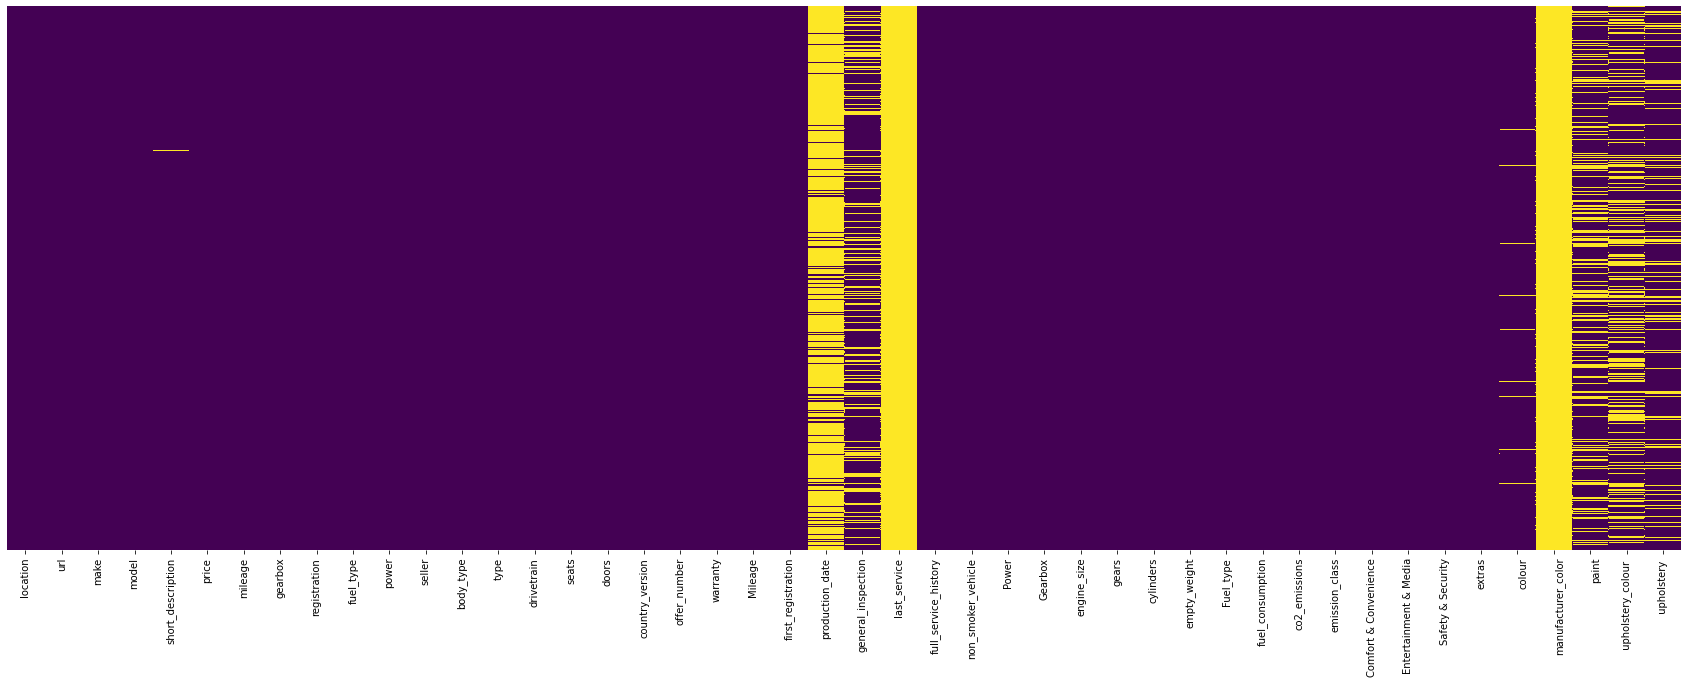

In [734]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [735]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

In [736]:
show_nans(df,0)

location                       0.000000
url                            0.000000
make                           0.000000
model                          0.000000
short_description              0.165550
price                          0.000000
mileage                        0.000000
gearbox                        0.000000
registration                   0.069865
fuel_type                      0.000000
power                          0.000000
seller                         0.000000
body_type                      0.000000
type                           0.000000
drivetrain                     0.000000
seats                          0.000000
doors                          0.000000
country_version                0.000000
offer_number                   0.000000
warranty                       0.000000
Mileage                        0.000000
first_registration             0.068346
production_date               89.473125
general_inspection            23.890889
last_service                 100.000000


In [737]:
df.head(1)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"WAGENINGEN, NL",https://www.autoscout24.com/offers/audi-a1-1-4...,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI 122 pk Pro Line S-Line 1 eigenaar/ NL...,"[['\n', '€ 15,945.-', '\n']]","['', ['42,091 km']]","\n,Automatic,\n",05/2012,"\n,Gasoline,\n","90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\n82-XDG-9,"\n,None,\n","[['\n'], ['']]",05/2012,NaN,03/2022,NaN,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,390 cc,\n","\n,7,\n","\n,4,\n","\n,1,100 kg,\n","\n,Super 95,\n","['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km ...","\n,122 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Digital radio', 'MP3', 'On-boa...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (18"")', 'Sport seats', 'Sport ...","\n4, Red",NaN,"\npaint, Metallic","\nupholstery, Black","\n8, Part leather"


> Drop columns that have %65 precentage and higher of missing values.

In [738]:
drop_columns=[
              # 'location', 
              'url', # useless
              # 'make', 
              # 'model', 
              'short_description', # complicated data ---------------------->
              # 'price',
              # 'mileage', 
              # 'gearbox', 
              # 'registration', 
              # 'fuel_type', 
              # 'power', 
              # 'seller',
              # 'body_type', 
              # 'type', 
              # 'drivetrain', 
              # 'seats', 
              # 'doors', 
              'country_version', # useless
              'offer_number', # useless
              # 'warranty', 
              'Mileage', # useless
              # 'first_registration',
              'production_date', # null
              # 'general_inspection', 
              'last_service', #null
              # 'full_service_history', 
              # 'non_smoker_vehicle', 
              'Power', # dublicate column
              'Gearbox', # dublicate column
              # 'engine_size', 
              # 'gears', 
              # 'cylinders', 
              # 'empty_weight', 
              'Fuel_type',# dublicate column
              # 'fuel_consumption', 
              # 'co2_emissions', 
              # 'emission_class',
              # '\nComfort & Convenience\n', 
              # '\nEntertainment & Media\n',
              # '\nSafety & Security\n',
              # 'extras', 
              # '\ncolour', # dublicate column
              '\nmanufacturer_color', # null
              # '\npaint',
              # ' upholstery_colour ',
              # ' upholstery ',
]
df.drop(drop_columns, axis = 1, inplace = True)

In [739]:
df.shape

(65841, 35)

## Percentages of Null Data

In [740]:
show_nans(df,0)

location                      0.000000
make                          0.000000
model                         0.000000
price                         0.000000
mileage                       0.000000
gearbox                       0.000000
registration                  0.069865
fuel_type                     0.000000
power                         0.000000
seller                        0.000000
body_type                     0.000000
type                          0.000000
drivetrain                    0.000000
seats                         0.000000
doors                         0.000000
warranty                      0.000000
first_registration            0.068346
general_inspection           23.890889
full_service_history          0.000000
non_smoker_vehicle            0.000000
engine_size                   0.000000
gears                         0.000000
cylinders                     0.000000
empty_weight                  0.000000
fuel_consumption              0.000000
co2_emissions            

\> At the begining, focus on the columns that have %15 precentage and higher of missing values. 

In [741]:
show_nans(df,15)

general_inspection     23.890889
\npaint                28.164821
 upholstery_colour     33.530779
 upholstery            15.999149
dtype: float64

## Rename Columns

In [742]:
df.columns

Index(['location', 'make', 'model', 'price', 'mileage', 'gearbox',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'warranty', 'first_registration',
       'general_inspection', 'full_service_history', 'non_smoker_vehicle',
       'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption',
       'co2_emissions', 'emission_class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [743]:
df.rename(columns={
                  "\nComfort & Convenience\n":"comfort_convenience",
                  "\nEntertainment & Media\n":"entertainment_media",
                  "\nSafety & Security\n":"safety_security",
                  "\ncolour":"colour",
                  "\nmanufacturer_color":"manufacturer_color",
                  "\npaint":"paint",
                  " upholstery_colour ":"upholstery_colour",
                  " upholstery ":"upholstery" },inplace=True)

> Open a header for all columns

## location

In [744]:
perc_nans(df.location)

0.0

In [745]:
df.location.value_counts(dropna=False)

ROTTERDAM, NL              1431
APELDOORN, NL              1176
AMSTERDAM, NL               959
TILBURG, NL                 906
HAARLEM, NL                 736
                           ... 
Luttenberg, NL                1
Zandvoort, NL                 1
Steensel, NL                  1
Wekerom, NL                   1
Berkel en rodenrijs, NL       1
Name: location, Length: 2288, dtype: int64

In [746]:
df.location = df.location.str.strip(", NL")
df.location = df.location.str.title()

## make

In [747]:
perc_nans(df.make)

0.0

In [748]:
df.make.value_counts(dropna=False)

\n,BMW ,\n              7775
\n,Volkswagen ,\n       7344
\n,Audi ,\n             6344
\n,Mercedes-Benz ,\n    5580
\n,Volvo ,\n            5184
\n,Renault ,\n          4839
\n,Peugeot ,\n          3869
\n,Toyota ,\n           3026
\n,Skoda ,\n            2911
\n,Kia ,\n              2894
\n,Hyundai ,\n          2631
\n,Opel ,\n             2574
\n,Citroen ,\n          2473
\n,Mazda ,\n            2324
\n,Fiat ,\n             2195
\n,Honda ,\n            1045
\n,Ford ,\n              971
\n,Dacia ,\n             937
\n,Chevrolet ,\n         465
\n,Tesla ,\n             460
Name: make, dtype: int64

In [749]:
df.make = df.make.str.split(",").apply(lambda x: x[1])

In [750]:
df.make.value_counts(dropna=False)

BMW               7775
Volkswagen        7344
Audi              6344
Mercedes-Benz     5580
Volvo             5184
Renault           4839
Peugeot           3869
Toyota            3026
Skoda             2911
Kia               2894
Hyundai           2631
Opel              2574
Citroen           2473
Mazda             2324
Fiat              2195
Honda             1045
Ford               971
Dacia              937
Chevrolet          465
Tesla              460
Name: make, dtype: int64

## model

In [751]:
perc_nans(df.model)

0.0

In [752]:
df.model

0         \n,A1,\n
1         \n,A3,\n
2         \n,A3,\n
3         \n,A7,\n
4         \n,A3,\n
           ...    
65836    \n,S60,\n
65837    \n,S60,\n
65838    \n,S40,\n
65839    \n,S60,\n
65840    \n,S60,\n
Name: model, Length: 65841, dtype: object

In [753]:
df.model.value_counts(dropna=False)

\n,A3,\n              1349
\n,Golf,\n            1025
\n,Megane,\n           968
\n,A4,\n               857
\n,2008,\n             851
                      ... 
\n,T6 Caravelle,\n       1
\n,300,\n                1
\n,E 270,\n              1
\n,CLA 35 AMG,\n         1
\n,Previa,\n             1
Name: model, Length: 694, dtype: int64

In [754]:
df.model = df.model.str.split(",").apply(lambda x: x[1])

In [755]:
df.model.value_counts(dropna=False)

A3          1349
Golf        1025
Megane       968
A4           857
2008         851
            ... 
S 300          1
Sienna         1
Stream         1
T6 Kombi       1
Elantra        1
Name: model, Length: 694, dtype: int64

In [756]:
df['make_model'] = df[['make','model']].apply(lambda x: x[0].strip()+' '+x[1].strip(), axis=1)
df.make_model.value_counts(dropna=False)

Audi A3                1349
Volkswagen Golf        1025
Renault Megane          968
Audi A4                 857
Peugeot 2008            851
                       ... 
Opel GT                   1
Volkswagen T6 Kombi       1
Mercedes-Benz E 270       1
Toyota Previa             1
Honda CRX                 1
Name: make_model, Length: 716, dtype: int64

In [757]:
df = df.drop(['make','model'], axis=1)

## price

> Target Column

In [758]:
perc_nans(df.price)

0.0

In [759]:
df.price.value_counts(dropna=False).sample(10)

[['\n', '€ 7,744.-', '\n']]       1
[['\n', '€ 98,258.-', '\n']]      1
[['\n', '€ 132,215.-', '\n']]     1
[['\n', '€ 33,865.-', '\n']]      2
[['\n', '€ 12,640.-', '\n']]      1
[['\n', '€ 35,140.-', '\n']]      1
[['\n', '€ 127,714.-', '\n']]     1
[['\n', '€ 20,745.-', '\n']]     23
[['\n', '€ 16,551.-', '\n']]      2
[['\n', '€ 29,244.-', '\n']]      1
Name: price, dtype: int64

In [760]:
df.price = df.price.str.extract('€ (\d*\,*\d*).-')[0].str.replace(",",'').astype('float')
df.price

0        15945.0
1        19490.0
2        19900.0
3        19800.0
4         5950.0
          ...   
65836     2495.0
65837     8950.0
65838     9250.0
65839     1999.0
65840     3950.0
Name: price, Length: 65841, dtype: float64

In [761]:
perc_nans(df.price)

2.2372078188362874

In [762]:
df = df.iloc[df[df.price.notna()==True].index,:]

In [763]:
perc_nans(df.price)

0.0

## mileage

In [764]:
perc_nans(df.mileage)

0.0

In [765]:
# df.mileage.sample(10)
df.mileage

0         ['', ['42,091 km']]
1        ['', ['133,585 km']]
2         ['', ['66,352 km']]
3        ['', ['156,201 km']]
4        ['', ['176,370 km']]
                 ...         
65836    ['', ['413,529 km']]
65837    ['', ['126,181 km']]
65838    ['', ['155,300 km']]
65839    ['', ['442,713 km']]
65840    ['', ['251,723 km']]
Name: mileage, Length: 64368, dtype: object

In [766]:
  df.mileage = df.mileage.str.extract('(\d*),(\d*) km').apply(lambda x: x[0]+x[1], axis=1).astype('float')

In [767]:
df.mileage

0         42091.0
1        133585.0
2         66352.0
3        156201.0
4        176370.0
           ...   
65836    413529.0
65837    126181.0
65838    155300.0
65839    442713.0
65840    251723.0
Name: mileage, Length: 64368, dtype: float64

In [768]:
perc_nans(df.mileage)

9.778150633855331

## gearbox

In [769]:
df.gearbox.sample(10)

42743    \n,Automatic,\n
19574    \n,Automatic,\n
5992     \n,Automatic,\n
12136       \n,Manual,\n
16123    \n,Automatic,\n
9698        \n,Manual,\n
45340       \n,Manual,\n
53432       \n,Manual,\n
57589    \n,Automatic,\n
51150       \n,Manual,\n
Name: gearbox, dtype: object

In [770]:
df.gearbox = df.gearbox.str.extract(',(\w*),')

In [771]:
df.gearbox.value_counts(dropna=False)

Automatic    38790
Manual       24895
NaN            683
Name: gearbox, dtype: int64

In [772]:
perc_nans(df.gearbox)

1.061086254039274

## first_registration

In [773]:
perc_nans(df.first_registration)

0.06991051454138703

In [774]:
df.first_registration

0        05/2012
1        05/2017
2        07/2016
3        01/2011
4        04/2005
          ...   
65836    06/2005
65837    03/2005
65838    06/2012
65839    02/2005
65840    10/2005
Name: first_registration, Length: 64368, dtype: object

In [775]:
df.first_registration = df.first_registration.str.extract('/(\d*)').astype('float')

In [776]:
df['age']= 2022 - df.first_registration

In [777]:
df.age.value_counts(dropna=False)

 1.0     9099
 5.0     6107
 6.0     5671
 4.0     4655
 2.0     4387
 7.0     3776
 3.0     3389
 11.0    3285
 10.0    3256
 8.0     3135
 9.0     3133
 12.0    2876
 14.0    2331
 13.0    2288
 15.0    1978
 16.0    1706
 17.0    1596
 0.0     1549
 NaN       45
 18.0      21
 19.0      16
 20.0      14
 21.0      13
 22.0       8
 25.0       6
 23.0       6
 26.0       4
 29.0       3
 24.0       3
 27.0       2
 30.0       2
 37.0       1
 28.0       1
 46.0       1
-6.0        1
-3.0        1
 41.0       1
 39.0       1
 31.0       1
Name: age, dtype: int64

## registration

In [778]:
data[data['first_registration']!=data['registration']][['first_registration','registration','power','empty_weight']]

,first_registration,registration,power,empty_weight
12810,None,NaN,"240 kW (326 hp),","\n,2,340 kg,\n"
12888,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12908,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12909,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12911,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
14671,None,NaN,"552 kW (751 hp),","\n,None,\n"
14800,None,NaN,"291 kW (396 hp),","\n,None,\n"
14810,None,NaN,"570 kW (775 hp),","\n,None,\n"
14811,None,NaN,"441 kW (600 hp),","\n,2,585 kg,\n"
14812,None,NaN,"570 kW (775 hp),","\n,None,\n"


In [779]:
shifted_rows=[29016,37232,37515,37579,38283,38289,58169,58171]
data.iloc[shifted_rows]

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
29016,"KERKRADE, NL",https://www.autoscout24.com/offers/volkswagen-...,"\n,Volkswagen ,\n","['\n', None, '\n']",Caddy 1.6 TDI Airco Trekhaak,"[['\n', '€ 6,950.-', '\n']]","['', ['152,938 km']]","\n,03/2014,\n",75 kW (102 hp),"\n,Manual,\n","2,159 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n4,"Country version,None",\nVLB16G,"\n,None,\n","[['\n'], ['']]",03/2014,None,New,None,"\n,None,\n","\n,None,\n","\n,75 kW (102 hp),\n","\n,Manual,\n","\n,1,598 cc,\n","\n,5,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","['\n', ['5.7 l/100 km (comb.)', '6.6 l/100 km ...","\n,149 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Electrical side mirrors...",[['On-board computer']],"[['ABS', 'Central door lock', 'Driver-side air...",[['Trailer hitch']],"\n4, Red",None,None,"\nupholstery, Grey","\n8, Other"
37232,"GRONINGEN, NL",https://www.autoscout24.com/offers/citroen-jum...,"\n,Citroen ,\n","['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' L...,"[['\n', '€ 28,989.-', '\n']]","['', ['4,997 km']]","\n,09/2021,\n",130 kW (177 hp),"\n,Automatic,\n","2,735 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n5,"Country version,Netherlands",\nVLL62P,"\n,6 months,\n","[['\n'], ['']]",09/2021,None,New,None,"\n,Yes,\n","\n,None,\n","\n,130 kW (177 hp),\n","\n,Automatic,\n","\n,1,997 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Alarm sys...","[['Alloy wheels (17"")', 'Trailer hitch', 'Voic...","\n4, Grey",None,"\npaint, Metallic",None,None
37515,"GRONINGEN, NL",https://www.autoscout24.com/offers/citroen-jum...,"\n,Citroen ,\n","['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' L...,"[['\n', '€ 28,989.-', '\n']]","['', ['4,997 km']]","\n,09/2021,\n",130 kW (177 hp),"\n,Automatic,\n","2,735 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n5,"Country version,Netherlands",\nVLL62P,"\n,6 months,\n","[['\n'], ['']]",09/2021,None,New,None,"\n,Yes,\n","\n,None,\n","\n,130 kW (177 hp),\n","\n,Automatic,\n","\n,1,997 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Alarm sys...","[['Alloy wheels (17"")', 'Trailer hitch', 'Voic...","\n4, Grey",None,"\npaint, Metallic",None,None
37579,"'T LOO OLDEBROEK, NL",https://www.autoscout24.com/offers/citroen-jum...,"\n,Citroen ,\n","['\n', None, '\n']",jumpy,"[['\n', '€ 17,500.-', '\n']]","['', ['59,000 km']]","\n,07/2017,\n",90 kW (122 hp),"\n,Manual,\n","1,588 kg,","['\n', ['Diesel\n']]","\n,Car transport,\n","\n,Used,\n","\n,Front,\n",\n3,\n4,"Country version,Netherlands",\n1,"\n,None,\n","[['\n'], ['']]",07/2017,2017,New,None,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Manual,\n","\n,1,997 cc,\n","\n,6,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Bluetooth'...","[['ABS', 'Alarm system', 'Central door lock wi...","[['Alloy wheels', 'Touch screen', 'Trailer hit...","\n4, Red",None,"\npaint, M

In [780]:
df.loc[shifted_rows,['empty_weight']] = df.loc[shifted_rows,['power']]
df.loc[shifted_rows,['power']] = df.loc[shifted_rows,['registration']]

In [781]:
df = df.drop(['registration','first_registration'],axis=1)

## fuel_type

In [782]:
perc_nans(df.fuel_type)

0.0

In [783]:
df.fuel_type

0        \n,Gasoline,\n
1        \n,Gasoline,\n
2        \n,Gasoline,\n
3        \n,Gasoline,\n
4        \n,Gasoline,\n
              ...      
65836         \n,LPG,\n
65837         \n,LPG,\n
65838     \n,Ethanol,\n
65839         \n,LPG,\n
65840         \n,CNG,\n
Name: fuel_type, Length: 64368, dtype: object

In [784]:
df.fuel_type = df.fuel_type.str.split(",").apply(lambda x: x[1])

In [785]:
df.fuel_type.value_counts(dropna=False)

Gasoline             37191
Diesel               12343
Electric/Gasoline     8645
Electric              5185
LPG                    486
Electric/Diesel        292
CNG                    105
Hydrogen                88
Others                  11
Ethanol                  9
Automatic                9
 None                    2
Manual                   2
Name: fuel_type, dtype: int64

## power

1 kW = 1.359622 hp

In [786]:
perc_nans(df.power) 

0.012428535918468804

In [787]:
df.power

0         90 kW (122 hp),
1         85 kW (116 hp),
2        110 kW (150 hp),
3        221 kW (300 hp),
4        147 kW (200 hp),
               ...       
65836    103 kW (140 hp),
65837    104 kW (141 hp),
65838    107 kW (145 hp),
65839    103 kW (140 hp),
65840    103 kW (140 hp),
Name: power, Length: 64368, dtype: object

In [788]:
df.power = df.power.str.extract('(\d*) hp')

In [789]:
perc_nans(df.power)

8.856885408898831

In [790]:
df.columns

Index(['location', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders',
       'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## seller

In [791]:
perc_nans(df.seller) 

0.0

In [792]:
df.seller.value_counts()

['\n', ['Dealer\n']]            59529
['\n', ['Private seller\n']]     4828
['\n', ['Diesel\n']]                4
['\n', ['Gasoline\n']]              4
['\n', ['Electric\n']]              3
Name: seller, dtype: int64

In [793]:
df.seller =df.seller.str.extract(' \W*(\w*)\\n*')

In [794]:
df.seller.value_counts()

Dealer      59529
Private      4828
Gasoline        4
Diesel          4
Electric        3
Name: seller, dtype: int64

## body_type

In [795]:
perc_nans(df.body_type)

0.0

In [796]:
df.body_type.value_counts(dropna=False)

\n,Off-Road/Pick-up,\n    17436
\n,Compact,\n             13909
\n,Station wagon,\n       11959
\n,Van,\n                  6756
\n,Sedan,\n                5652
\n,Convertible,\n          3045
\n,Transporter,\n          2229
\n,Coupe,\n                1945
\n,None,\n                  848
\n,Other,\n                 583
\n,Panel van,\n               3
\n,Flatbed van,\n             2
\n,Car transport,\n           1
Name: body_type, dtype: int64

In [797]:
df.body_type = df.body_type.apply(lambda x:x.split(',')[1])

In [798]:
df.body_type.value_counts(dropna=False)

Off-Road/Pick-up    17436
Compact             13909
Station wagon       11959
Van                  6756
Sedan                5652
Convertible          3045
Transporter          2229
Coupe                1945
None                  848
Other                 583
Panel van               3
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

## type

In [799]:
perc_nans(df.type)

0.0

In [800]:
df.type.value_counts(dropna=False)

\n,Used,\n                 56380
\n,New,\n                   4044
\n,Demonstration,\n         2029
\n,Pre-registered,\n        1066
\n,None,\n                   848
\n,Antique / Classic,\n        1
Name: type, dtype: int64

In [801]:
df.type = df.type.apply(lambda x:x.split(',')[1])

In [802]:
df.type.value_counts(dropna=False)

Used                 56380
New                   4044
Demonstration         2029
Pre-registered        1066
None                   848
Antique / Classic        1
Name: type, dtype: int64

## drivetrain

In [803]:
perc_nans(df.drivetrain)

0.0

In [804]:
df.drivetrain.sample(10)

27469    \n,Front,\n
41464    \n,Front,\n
6566     \n,Front,\n
16202     \n,Rear,\n
18895     \n,Rear,\n
24572    \n,Front,\n
6201       \n,4WD,\n
31779    \n,Front,\n
22297    \n,Front,\n
43482    \n,Front,\n
Name: drivetrain, dtype: object

In [805]:
df.drivetrain = df.drivetrain.apply(lambda x:x.split(',')[1])

In [806]:
df.drivetrain.value_counts(dropna=False)

Front    34729
None     14588
4WD       7698
Rear      7353
Name: drivetrain, dtype: int64

In [807]:
df.columns

Index(['location', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders',
       'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## seats

In [808]:
perc_nans(df.seats)

0.0

In [809]:
df.seats.unique()

array(['\n4', '\n5', 'None\n', '\n2', '\n6', '\n7', '\n3', '\n8', '\n9',
       '\n1'], dtype=object)

In [810]:
df.seats = df.seats.str.extract('(\d)')

In [811]:
df.seats.value_counts(dropna=False)

5      48302
4       6196
NaN     4940
7       1986
2       1718
3        853
6        259
8         57
9         54
1          3
Name: seats, dtype: int64

## doors

In [812]:
perc_nans(df.doors)

0.0

In [813]:
df.doors.sample(10)

42631    \n5
29786    \n5
28445    \n5
29886    \n5
9219     \n5
65192    \n5
59404    \n5
43631    \n5
49781    \n4
65309    \n5
Name: doors, dtype: object

In [814]:
df.doors = df.doors.str.extract('(\d)')

In [815]:
df.doors.value_counts(dropna=False)

5      47683
4       8631
2       4659
3       2272
NaN     1044
6         75
1          4
Name: doors, dtype: int64

## warranty

In [816]:
df.warranty.value_counts()

\n,None,\n         41751
\n,6 months,\n     17683
\n,3 months,\n      1767
\n,12 months,\n     1467
\n,24 months,\n     1142
\n,84 months,\n      252
\n,1 months,\n       232
\n,18 months,\n       34
\n,36 months,\n       15
\n,2 months,\n         8
\n,48 months,\n        7
\n,Yes,\n              3
\n,60 months,\n        2
\n,9 months,\n         1
\n,26 months,\n        1
\n,4 months,\n         1
\n,5 months,\n         1
\n,10 months,\n        1
Name: warranty, dtype: int64

In [817]:
df.warranty = df.warranty.replace('\n,Yes,\n','\n,1 months,\n')

In [818]:
df.warranty = df.warranty.str.extract(',(\d*) months')

In [819]:
df.warranty.value_counts(dropna=False)

NaN    41751
6      17683
3       1767
12      1467
24      1142
84       252
1        235
18        34
36        15
2          8
48         7
60         2
26         1
4          1
10         1
9          1
5          1
Name: warranty, dtype: int64

In [820]:
# perc_nans(df.warranty)
df.columns

Index(['location', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders',
       'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## Make

In [ ]:
df.Make.sample(20)

10749       \nOpel\n
11931       \nOpel\n
8865        \nOpel\n
1995        \nAudi\n
4941        \nAudi\n
1714        \nAudi\n
4285        \nAudi\n
2840        \nAudi\n
14577    \nRenault\n
3885        \nAudi\n
7884        \nOpel\n
3607        \nAudi\n
9717        \nOpel\n
11499       \nOpel\n
3900        \nAudi\n
12408       \nOpel\n
15757    \nRenault\n
13667    \nRenault\n
967         \nAudi\n
7196        \nOpel\n
Name: Make, dtype: object

In [ ]:
df.Make= df.Make.str.strip('\n')

In [ ]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

## Model

In [ ]:
df.Model.sample(20)

9622        [\n, Corsa, \n]
5943        [\n, Astra, \n]
8444        [\n, Corsa, \n]
14870        [\n, Clio, \n]
12907    [\n, Insignia, \n]
6459        [\n, Astra, \n]
9062        [\n, Corsa, \n]
11479    [\n, Insignia, \n]
3669           [\n, A3, \n]
3545           [\n, A3, \n]
9610        [\n, Corsa, \n]
15665      [\n, Espace, \n]
15839      [\n, Espace, \n]
13637        [\n, Clio, \n]
11599    [\n, Insignia, \n]
940            [\n, A1, \n]
1211           [\n, A1, \n]
913            [\n, A1, \n]
1687           [\n, A1, \n]
10742    [\n, Insignia, \n]
Name: Model, dtype: object

In [ ]:
df.Modal = df.Model.str[1]

In [ ]:
df.Modal.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

## Body_Color

In [ ]:
df.Body_Color

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body_Color, Length: 15919, dtype: object

In [ ]:
df.Body_Color= df.Body_Color.str[1]

In [ ]:
df.Body_Color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

## Paint_Type

In [ ]:
df.Paint_Type = df.Paint_Type.str[0].str.strip('\n')

In [ ]:
df.Paint_Type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

## Upholstery

In [ ]:
df.Upholstery.sample(10)

7440      [\nCloth, Grey\n]
9569                    NaN
6386     [\nCloth, Black\n]
14657    [\nCloth, Black\n]
4410                    NaN
14825    [\nCloth, Black\n]
8720     [\nCloth, Black\n]
13952                   NaN
172      [\nOther, Black\n]
14829    [\nCloth, Black\n]
Name: Upholstery, dtype: object

In [ ]:
df.Upholstery = df.Upholstery.apply(lambda x : x[0] if type(x)==list else x)

In [ ]:
df.Upholstery.sample(10)

3318         \nFull leather\n
12069        \nCloth, Black\n
10420                     NaN
7721                \nBlack\n
6667                      NaN
13766        \nCloth, Black\n
12775    \nalcantara, Black\n
10330        \nCloth, Black\n
3306                      NaN
10174        \nCloth, Black\n
Name: Upholstery, dtype: object

In [ ]:
df.Upholstery = df.Upholstery.str.strip("\n").str.split(", ")

In [ ]:
df.Upholstery.sample(10)

6847                       NaN
5194            [Cloth, Other]
15756    [Part leather, Brown]
12991           [Cloth, Other]
5555                   [Cloth]
3631                       NaN
11421                  [Black]
838                        NaN
13626                  [Black]
3365            [Cloth, Black]
Name: Upholstery, dtype: object

In [ ]:
df.Upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Velour, Black]            36
[Full leather, Beige]      36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Cloth, Blue]              12
[Brown]                    12
[Velour, Grey]              8
[Cloth, White]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

    >> It has 2 types of infos. kind and color. we will create 2 new columns for these.

    >> We divide it into 5 categories to find out what kind of material it is made of.

In [ ]:
types = ["Cloth",'Part leather', 'Full leather','Velour', 'alcantara']
df['Upholstery_Type'] = df.Upholstery.apply(lambda x : x[0] if type(x) == list and x[0] in types else np.nan)

In [ ]:
df.Upholstery_Type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

    >> We divide it into 9 categories to find out what colour Upholstery has.

In [ ]:
colors = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in colors:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_Color']= df.Upholstery.apply(finder)

In [ ]:
df.Upholstery_Color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_Color, dtype: int64

In [ ]:
df.drop("Upholstery", axis=1, inplace=True)

## Nr_of_Doors

In [ ]:
 df.Nr_of_Doors.sample(10)

3391     [\n5\n]
7059     [\n5\n]
13084    [\n5\n]
12311    [\n4\n]
7223     [\n5\n]
1219     [\n5\n]
12035    [\n5\n]
15726    [\n5\n]
13421    [\n5\n]
7147     [\n5\n]
Name: Nr_of_Doors, dtype: object

In [ ]:
df.Nr_of_Doors = df.Nr_of_Doors.str[0].str.strip('\n').astype('float')

In [ ]:
df.Nr_of_Doors.value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: Nr_of_Doors, dtype: int64

## Nr_of_Seats

In [ ]:
df.Nr_of_Seats.sample(10)

10368    [\n5\n]
5854     [\n5\n]
8057     [\n5\n]
7219     [\n5\n]
6692     [\n5\n]
6989     [\n5\n]
8402     [\n5\n]
15208    [\n5\n]
10952    [\n5\n]
13440    [\n5\n]
Name: Nr_of_Seats, dtype: object

In [ ]:
df.Nr_of_Seats = df.Nr_of_Seats.str[0].str.strip('\n').astype('float')

In [ ]:
df.Nr_of_Seats.value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr_of_Seats, dtype: int64

## Displacement

    >> Engine displacement is the measure of the cylinder volume.

In [ ]:
df.Displacement.sample(10)

15276    [\n1,598 cc\n]
3658     [\n1,598 cc\n]
11150    [\n1,598 cc\n]
14419    [\n1,618 cc\n]
13109    [\n1,197 cc\n]
15322    [\n1,598 cc\n]
9870     [\n1,398 cc\n]
2792     [\n1,598 cc\n]
4272     [\n1,968 cc\n]
3454     [\n1,598 cc\n]
Name: Displacement, dtype: object

In [ ]:
df.Displacement = df.Displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})')[0].astype("float")

## Cylinders

In [ ]:
df.Cylinders.sample(10)

12377        NaN
5116     [\n4\n]
926      [\n3\n]
4645         NaN
2339         NaN
12428        NaN
15332    [\n4\n]
13472        NaN
1827     [\n3\n]
11815        NaN
Name: Cylinders, dtype: object

In [ ]:
df.Cylinders= df.Cylinders.str[0].str.strip('\n').astype("float")

In [ ]:
df.Cylinders.value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

## Weight

In [ ]:
df.Weight.sample(10)

6863                NaN
7950                NaN
772      [\n1,275 kg\n]
15258    [\n1,734 kg\n]
12739    [\n1,503 kg\n]
7894                NaN
3155     [\n1,865 kg\n]
4977     [\n1,335 kg\n]
3196                NaN
3706                NaN
Name: Weight, dtype: object

In [ ]:
df.Weight= df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

In [ ]:
df.Weight.value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
900.0        1
1650.0       1
1428.0       1
2355.0       1
1523.0       1
Name: Weight, Length: 435, dtype: int64

## Drive_Chain

In [ ]:
df.Drive_Chain.sample(10)

12741    [\nfront\n]
14527    [\nfront\n]
13860    [\nfront\n]
2661     [\nfront\n]
3270     [\nfront\n]
7198             NaN
4493     [\nfront\n]
15615    [\nfront\n]
12726            NaN
6011     [\nfront\n]
Name: Drive_Chain, dtype: object

In [ ]:
df.Drive_Chain= df.Drive_Chain.str[0].str.strip('\n')

In [ ]:
df.Drive_Chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_Chain, dtype: int64

## Fuel

In [ ]:
df.Fuel.sample(10)

1575                        [\n, Gasoline, \n]
2071                        [\n, Gasoline, \n]
5963                          [\n, Diesel, \n]
15519                         [\n, Diesel, \n]
2179                        [\n, Gasoline, \n]
10467    [\n, Diesel (Particulate Filter), \n]
3465     [\n, Diesel (Particulate Filter), \n]
13495                         [\n, Diesel, \n]
5997                        [\n, Super 95, \n]
3467     [\n, Diesel (Particulate Filter), \n]
Name: Fuel, dtype: object

In [ ]:
df.Fuel.str[1].unique()

array(['Diesel (Particulate Filter)', 'Gasoline', 'Super 95',
       'Regular/Benzine 91', 'Diesel',
       'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98',
       'Super E10 95', 'Super 95 (Particulate Filter)',
       'Super 95 / Regular/Benzine 91',
       'Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95',
       'Super 95 / Regular/Benzine 91 / Super Plus 98',
       'Super 95 / Super Plus 98 / Super E10 95',
       'Super 95 / Super Plus 98',
       'Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91',
       'Others', 'Super 95 / Super E10 95',
       'Gasoline (Particulate Filter)',
       'Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98 (Particulate Filter)',
       'Regular/Benzine E10 91',
  

In [ ]:
df.Fuel.str[1].str.split("/").str[0].str.strip()

0        Diesel (Particulate Filter)
1                           Gasoline
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
                    ...             
15914    Diesel (Particulate Filter)
15915                       Super 95
15916                         Diesel
15917                         Diesel
15918                       Super 95
Name: Fuel, Length: 15919, dtype: object

In [ ]:
df.Fuel = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [ ]:
df.Fuel.str.split("(").str[0].str.strip()

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Super 95
15916      Diesel
15917      Diesel
15918    Super 95
Name: Fuel, Length: 15919, dtype: object

In [ ]:
df.Fuel=df.Fuel.str.split("(").str[0].str.strip()

    >> Group those with the same or close type of fuel to reduce complexity.

In [ ]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

In [ ]:
fueltype = lambda x : ("Benzine"*(x in benzine)) or ("LPG/CNG"*(x in lpg)) or x

In [ ]:
df.Fuel.apply(fueltype).unique()

array(['Diesel', 'Benzine', 'LPG/CNG', 'Electric'], dtype=object)

In [ ]:
df.Fuel = df.Fuel.apply(fueltype)

In [ ]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

## Consumption

In [ ]:
df.Consumption.sample(10)

660      [\n, 4.2 l/100 km (comb), \n, 5 l/100 km (city...
13551    [[3.3 l/100 km (comb)], [3.5 l/100 km (city)],...
5770     [\n, 5.1 l/100 km (comb), \n, 6.3 l/100 km (ci...
2341     [\n, 4.8 l/100 km (comb), \n, 5.9 l/100 km (ci...
3190     [[4 l/100 km (comb)], [4.7 l/100 km (city)], [...
15616    [[4.7 l/100 km (comb)], [5.1 l/100 km (city)],...
1043     [[4.4 l/100 km (comb)], [5.4 l/100 km (city)],...
2450     [\n, 4.7 l/100 km (comb), \n, 5.9 l/100 km (ci...
3545     [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1836     [[3.8 l/100 km (comb)], [4.6 l/100 km (city)],...
Name: Consumption, dtype: object

In [ ]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [ ]:
df['Combumption_Comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Consumption_City'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Consumption_Country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [ ]:
df.drop('Consumption', axis=1,inplace=True)

## CO2_Emission

In [ ]:
df.CO2_Emission.sample(10)

14113    [\n114 g CO2/km (comb)\n]
15783    [\n168 g CO2/km (comb)\n]
2749     [\n102 g CO2/km (comb)\n]
2938     [\n116 g CO2/km (comb)\n]
4569     [\n103 g CO2/km (comb)\n]
7822     [\n130 g CO2/km (comb)\n]
2840      [\n99 g CO2/km (comb)\n]
13372     [\n92 g CO2/km (comb)\n]
5519     [\n114 g CO2/km (comb)\n]
10895    [\n118 g CO2/km (comb)\n]
Name: CO2_Emission, dtype: object

In [ ]:
df.CO2_Emission=df.CO2_Emission.apply(lambda x : x[0] if type(x)==list else x).str.strip('\n').str.extract('(\d*)')[0].astype("float")

In [ ]:
df.CO2_Emission.value_counts(dropna=False)

NaN      2436
120.0     740
99.0      545
97.0      537
104.0     501
         ... 
193.0       1
239.0       1
51.0        1
45.0        1
253.0       1
Name: CO2_Emission, Length: 120, dtype: int64

## Emission_Class

In [ ]:
df.Emission_Class.sample(20)

11214          [\nEuro 6\n]
50             [\nEuro 6\n]
6137           [\nEuro 6\n]
10027    [\nEuro 6d-TEMP\n]
3806           [\nEuro 6\n]
2111     [\nEuro 6d-TEMP\n]
7939     [\nEuro 6d-TEMP\n]
7592     [\nEuro 6d-TEMP\n]
11671                   NaN
11213          [\nEuro 6\n]
1223           [\nEuro 6\n]
14851          [\nEuro 6\n]
15294          [\nEuro 6\n]
9533           [\nEuro 6\n]
10133    [\nEuro 6d-TEMP\n]
9795           [\nEuro 6\n]
2877           [\nEuro 6\n]
10287    [\nEuro 6d-TEMP\n]
13186                   NaN
4808           [\nEuro 6\n]
Name: Emission_Class, dtype: object

In [ ]:
df.Emission_Class = df.Emission_Class.apply(lambda x : x[0] if type(x)==list else x).str.strip("\n")

In [ ]:
df.Emission_Class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

    >> Group them

In [ ]:
df.Emission_Class=df.Emission_Class.str.extract('(Euro \d)')[0]

In [ ]:
# Alternative
# df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [ ]:
df.Emission_Class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

## Gears

In [ ]:
df.Gears.sample(10)

15420    [\n6\n]
14398        NaN
15119        NaN
14123        NaN
14603    [\n5\n]
11501    [\n6\n]
10314        NaN
9857     [\n6\n]
5103     [\n7\n]
13929        NaN
Name: Gears, dtype: object

In [ ]:
df.Gears = df.Gears.str[0].str.strip('\n')

## Comfort_Convenience

In [ ]:
df.Comfort_Convenience.sample(20)

10090    [Air conditioning, Cruise control, Electricall...
4654     [Air conditioning, Armrest, Automatic climate ...
7751     [Air conditioning, Armrest, Automatic climate ...
12038    [Air conditioning, Armrest, Automatic climate ...
318      [Air conditioning, Armrest, Automatic climate ...
8793     [Air conditioning, Electrical side mirrors, Mu...
11151    [Air conditioning, Cruise control, Electricall...
15042    [Air conditioning, Automatic climate control, ...
9037     [Air conditioning, Cruise control, Electrical ...
553      [Air conditioning, Automatic climate control, ...
2361                                                   NaN
6872     [Air conditioning, Armrest, Automatic climate ...
9788     [Air conditioning, Electrical side mirrors, Hi...
2893     [Air conditioning, Electrical side mirrors, Mu...
11823    [Air conditioning, Armrest, Automatic climate ...
7600     [Air conditioning, Armrest, Automatic climate ...
10235    [Air conditioning, Electrical side mirrors, Le.

In [ ]:
df.Comfort_Convenience=df.Comfort_Convenience.apply(lambda x : ",".join(x) if type(x)==list else x)

In [ ]:
df.Comfort_Convenience.value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                              216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                                                                                                                                                          134
Air conditioning,Power windows                                                                                                  

## Entertainment_Media

In [ ]:
df.Entertainment_Media.sample(10)

8194     [Bluetooth, Hands-free equipment, On-board com...
9076     [Bluetooth, CD player, Hands-free equipment, O...
11374                                                  NaN
13857    [Bluetooth, Hands-free equipment, On-board com...
3009     [Bluetooth, CD player, Hands-free equipment, M...
8843     [Bluetooth, Digital radio, Hands-free equipmen...
7530     [Bluetooth, Hands-free equipment, On-board com...
3272                                          [MP3, Radio]
9866                         [Bluetooth, CD player, Radio]
2018     [Bluetooth, CD player, Hands-free equipment, M...
Name: Entertainment_Media, dtype: object

In [ ]:
df.Entertainment_Media=df.Entertainment_Media.apply(lambda x : ",".join(x) if type(x)==list else x)
df.Entertainment_Media.value_counts(dropna=False)

NaN                                                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                     783
On-board computer,Radio                                                                                      487
                                                                                                            ... 
Bluetooth,Digital radio,MP3,Sound system,USB                                                                   1
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Sound system,Television,USB       1
CD player,Digital radio,MP3                                                                     

## Extras

In [ ]:
df.Extras.sample(10)

3619         [Alloy wheels, Sport seats, Sport suspension]
10548    [Alloy wheels, Catalytic Converter, Roof rack,...
13801    [Alloy wheels, Shift paddles, Sport package, S...
15071                         [Alloy wheels, Touch screen]
7398                             [Roof rack, Touch screen]
1437            [Alloy wheels, Sport seats, Voice Control]
10080                                       [Alloy wheels]
4941                             [Alloy wheels, Roof rack]
6298                                           [Roof rack]
3041                                        [Alloy wheels]
Name: Extras, dtype: object

In [ ]:
df.Extras=df.Extras.apply(lambda x : ",".join(x) if type(x)==list else x)

In [ ]:
df.Extras.value_counts(dropna=False)

Alloy wheels                                                                        3245
NaN                                                                                 2962
Alloy wheels,Touch screen                                                            697
Alloy wheels,Voice Control                                                           577
Alloy wheels,Touch screen,Voice Control                                              541
                                                                                    ... 
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Sport seats,Voice Control       1
Roof rack,Sport seats,Trailer hitch                                                    1
Alloy wheels,Handicapped enabled,Shift paddles,Sport seats,Touch screen                1
Catalytic Converter,Roof rack,Shift paddles,Touch screen,Trailer hitch                 1
Alloy wheels,Catalytic Converter,Roof rack,Sport suspension                            1
Name: Extras, Length:

## Safety_Security

In [ ]:
df.Safety_Security.sample(10)

6355     [ABS, Central door lock, Daytime running light...
5965     [ABS, Central door lock, Daytime running light...
12300                    [Fog lights, Immobilizer, Isofix]
9969     [ABS, Central door lock, Daytime running light...
891      [ABS, Central door lock, Daytime running light...
2668     [ABS, Alarm system, Central door lock, Central...
4771     [ABS, Central door lock, Driver-side airbag, E...
769                                                    NaN
10118    [ABS, Central door lock, Daytime running light...
11437    [ABS, Adaptive headlights, Blind spot monitor,...
Name: Safety_Security, dtype: object

In [ ]:
df.Safety_Security=df.Safety_Security.apply(lambda x : ",".join(x) if type(x)==list else x)

In [ ]:
df.Safety_Security[0]

'ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights'

    >> All columns are cleaned

In [ ]:
df.shape

(15919, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  15919 non-null  object 
 1   make_model           15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   price                15919 non-null  int64  
 4   vat                  11406 non-null  object 
 5   km                   14895 non-null  float64
 6   hp                   15831 non-null  float64
 7   Type                 15917 non-null  object 
 8   Previous_Owners      9279 non-null   float64
 9   Inspection_New       3932 non-null   object 
 10  Warranty             4853 non-null   float64
 11  Make                 15919 non-null  object 
 12  Model                15919 non-null  object 
 13  Body_Color           15322 non-null  object 
 14  Paint_Type           10147 non-null  object 
 15  Nr_of_Doors          15707 non-null 

In [ ]:
df.to_csv("clean_scout_20201204.csv", index=False)